In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
housing_raw = pd.read_csv("D:/STUDIES/Data Visualization/Data/housing_data.csv", 
                          parse_dates=['period_begin', 'period_end'], 
                          dtype={'total_homes_sold':'Int32', 'region_name': 'category'})

In [3]:
housing_raw.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
0,"Appling County, GA",2020-04-27,2020-07-19,<NA>,1.0,1.0,222.7,136195.8,NaN
1,"Tooele County, UT",2018-08-27,2018-11-18,325,NaN,NaN,NaN,NaN,NaN
2,"Johnson County, TX",2019-09-23,2019-12-15,577,717.0,778.0,63.0,268737.6,17.095583
3,"Holmes County, OH",2017-10-09,2017-12-31,22,52.0,54.0,109.4,115308.3,34.050000
4,"Madison County, FL",2017-01-09,2017-04-02,12,54.0,55.0,151.2,158062.5,38.300000


In [4]:
housing_raw.shape

(622339, 9)

In [5]:
housing_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622339 entries, 0 to 622338
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   region_name               622339 non-null  category      
 1   period_begin              622339 non-null  datetime64[ns]
 2   period_end                622339 non-null  datetime64[ns]
 3   total_homes_sold          567839 non-null  Int32         
 4   inventory                 616247 non-null  float64       
 5   active_listings           616905 non-null  float64       
 6   age_of_inventory          616247 non-null  float64       
 7   median_active_list_price  616513 non-null  float64       
 8   months_of_supply          561319 non-null  float64       
dtypes: Int32(1), category(1), datetime64[ns](2), float64(5)
memory usage: 37.5 MB


In [6]:
ca_housing = housing_raw.loc[housing_raw['region_name'].str.contains("CA")]\
.assign(region_name = housing_raw['region_name'].str[0:-11])

In [7]:
ca_housing.head()

,region_name,period_begin,period_end,total_homes_sold,inventory,active_listings,age_of_inventory,median_active_list_price,months_of_supply
6,Sacramento,2020-06-22,2020-09-13,5107,1729.0,2206.0,27.5,445540.9,5.235794
164,Nevada,2018-09-03,2018-11-25,529,480.0,517.0,71.4,557508.3,12.165607
252,Stanislaus,2017-06-05,2017-08-27,1572,1042.0,1193.0,38.8,320660.0,9.212632
293,Tehama,2020-01-20,2020-04-12,102,241.0,252.0,99.2,297979.1,31.530228
304,Stanislaus,2017-11-13,2018-02-04,1200,797.0,907.0,56.5,330049.9,9.744362


In [8]:
ca_housing.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 15228 entries, 6 to 622302
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   region_name               15228 non-null  object        
 1   period_begin              15228 non-null  datetime64[ns]
 2   period_end                15228 non-null  datetime64[ns]
 3   total_homes_sold          14841 non-null  Int32         
 4   inventory                 15217 non-null  float64       
 5   active_listings           15218 non-null  float64       
 6   age_of_inventory          15217 non-null  float64       
 7   median_active_list_price  15208 non-null  float64       
 8   months_of_supply          14829 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(5), object(1)
memory usage: 1.9 MB


In [9]:
ca_housing_pivot = ca_housing.pivot_table(index="period_begin", columns="region_name", 
                                          values="median_active_list_price").assign(CA_average = lambda x : x.mean(axis=1))

In [10]:
ca_housing_pivot

region_name,Alameda,Alpine,Amador,Butte,Calaveras,Colusa,Contra Costa,El Dorado,Fresno,Glenn,...,Stanislaus,Sutter,Tehama,Trinity,Tulare,Tuolumne,Ventura,Yolo,Yuba,CA_average
period_begin,,,,,,,,,,,,,,,,,,,,,
2017-01-02,730602.5,317541.6,408570.6,291315.3,503458.3,339075.0,603901.2,557404.1,251850.0,237145.8,...,300302.0,257172.9,241695.8,374187.5,225395.8,493908.3,661054.7,447859.2,326833.3,492258.437736
2017-01-09,736230.0,324125.0,408566.4,292348.2,517645.8,340291.6,610701.2,563658.3,253016.6,237145.8,...,301900.0,264609.3,243979.1,368312.5,227729.1,449816.6,662463.1,449942.5,336129.1,493710.639623
2017-01-16,742021.6,330708.3,408483.2,293514.9,524108.3,340291.6,616534.5,565908.3,254187.5,237841.6,...,303858.3,270795.8,246266.6,363729.1,229060.4,412975.0,664828.6,453525.8,345425.0,495369.416981
2017-01-23,748271.7,341458.3,408404.0,294619.1,536408.3,341958.3,621617.8,567158.3,255854.1,238041.6,...,306350.0,274861.4,248141.6,360437.5,229806.2,373483.3,666362.5,456875.8,354720.8,497191.662264
2017-01-30,753938.4,355541.6,407079.0,295527.4,543704.1,344041.6,625516.2,567533.3,258000.0,238125.0,...,308191.6,279764.5,249762.5,360250.0,230139.5,333991.6,668787.5,458300.8,364016.6,499286.207547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,993370.2,493750.0,490808.3,462903.3,536384.6,388843.1,828948.5,699814.4,423755.8,383095.8,...,490624.0,461765.4,413387.3,464625.0,387928.9,479870.2,863099.5,655881.0,463954.5,686582.361818
2022-04-04,997424.5,478666.6,490808.3,462153.3,535051.2,388183.3,829281.8,699752.0,425564.1,383720.8,...,489378.1,462190.4,416804.0,468041.6,388951.8,478203.5,865182.9,654630.9,462704.5,687180.140000
2022-04-11,997720.8,469981.6,490808.3,461320.0,534126.2,392475.0,829281.8,699760.3,426772.5,385720.8,...,488128.1,462948.7,420220.6,476333.3,389863.7,469599.3,867682.8,654805.0,462830.0,687730.720000


In [11]:
ca_housing_markets = ca_housing_pivot.loc[:,["San Francisco", "Los Angeles", "San Diego", "CA_average"]]

In [12]:
ca_housing_markets.head()

region_name,San Francisco,Los Angeles,San Diego,CA_average
period_begin,,,,
2017-01-02,1229018.7,611561.0,618570.8,492258.437736
2017-01-09,1233393.7,614061.0,621737.5,493710.639623
2017-01-16,1239977.0,617311.0,625820.8,495369.416981
2017-01-23,1247977.0,620644.3,629491.6,497191.662264
2017-01-30,1253310.4,624541.6,632824.0,499286.207547


Text(0, 0.5, 'Price (Millions)')

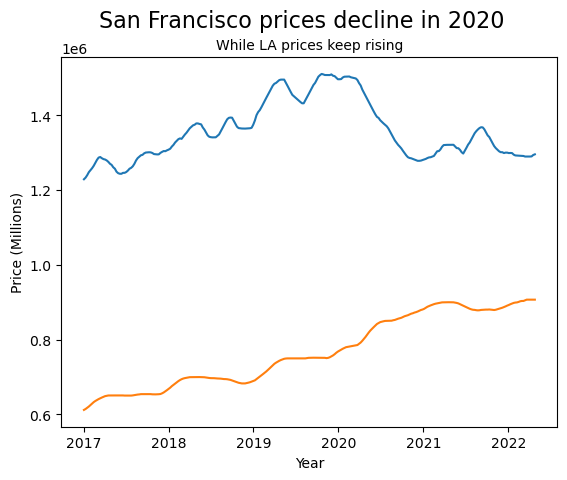

In [13]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(ca_housing_markets.index, ca_housing_markets['San Francisco'])
ax.plot(ca_housing_markets.index, ca_housing_markets['Los Angeles'])

fig.suptitle("San Francisco prices decline in 2020", fontsize = 16)
ax.set_title("While LA prices keep rising", fontsize = 10)
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Price (Millions)", fontsize=10)

# chart legends

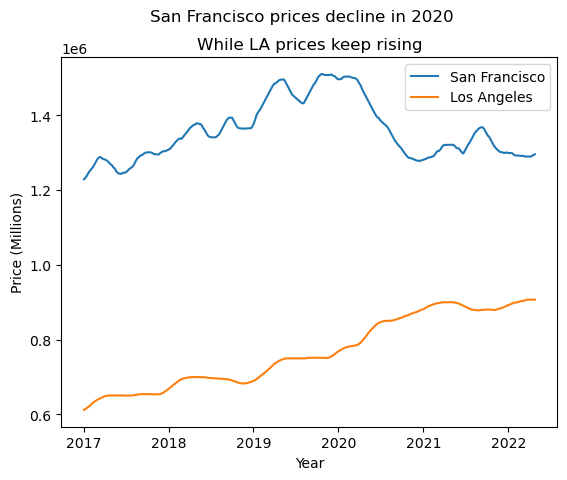

In [14]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(ca_housing_markets.index, ca_housing_markets['San Francisco'], label="San Francisco")
ax.plot(ca_housing_markets.index, ca_housing_markets['Los Angeles'], label = "Los Angeles")

fig.suptitle("San Francisco prices decline in 2020")
ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.legend()

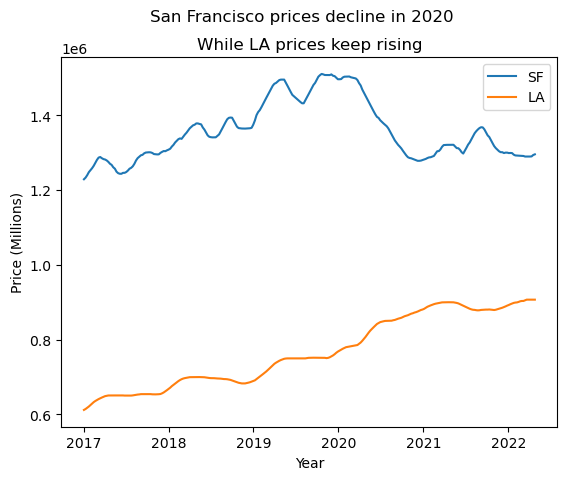

In [15]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(ca_housing_markets.index, ca_housing_markets['San Francisco'], label="San Francisco")
ax.plot(ca_housing_markets.index, ca_housing_markets['Los Angeles'], label = "Los Angeles")

fig.suptitle("San Francisco prices decline in 2020")
ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.legend(["SF", "LA"])

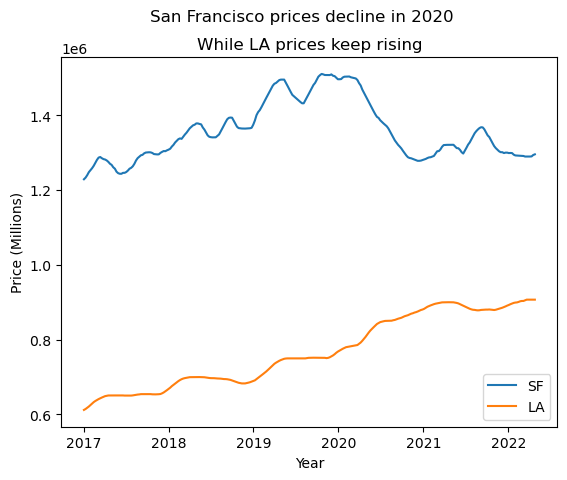

In [16]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(ca_housing_markets.index, ca_housing_markets['San Francisco'], label="San Francisco")
ax.plot(ca_housing_markets.index, ca_housing_markets['Los Angeles'], label = "Los Angeles")

fig.suptitle("San Francisco prices decline in 2020")
ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.legend(["SF", "LA"], loc="lower right")

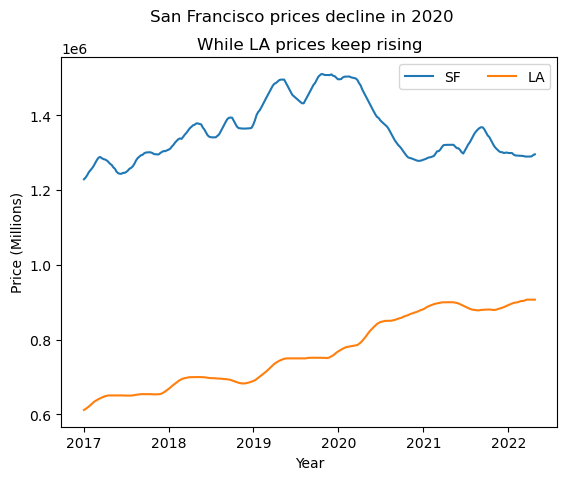

In [17]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(ca_housing_markets.index, ca_housing_markets['San Francisco'], label="San Francisco")
ax.plot(ca_housing_markets.index, ca_housing_markets['Los Angeles'], label = "Los Angeles")

fig.suptitle("San Francisco prices decline in 2020")
ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.legend(["SF", "LA"], bbox_to_anchor = (1,1), ncol=2, frameon=True)

# Line style

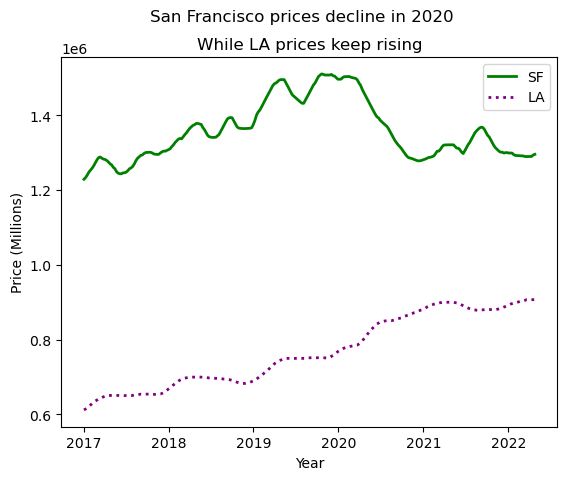

In [18]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['San Francisco'], 
    label="San Francisco",
    color = "green",
    linewidth = 2)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['Los Angeles'], 
    label = "Los Angeles",
    ls = ":",
    color = "purple",
    linewidth = 2)

fig.suptitle("San Francisco prices decline in 2020")
ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.legend(["SF", "LA"], bbox_to_anchor = (1,1))

# Axis limits

(0.0, 1600000.0)

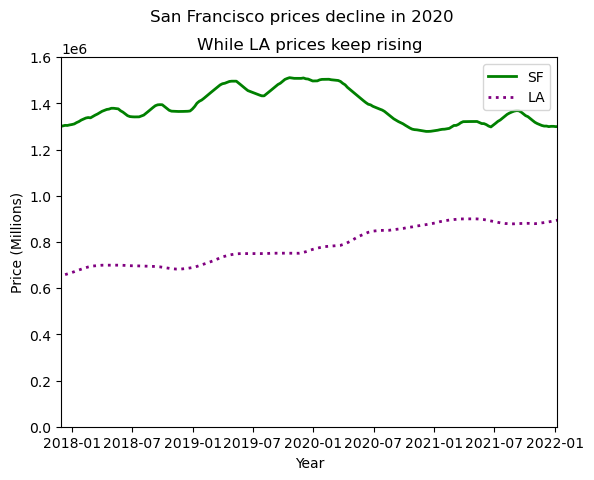

In [19]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['San Francisco'], 
    label="San Francisco",
    color = "green",
    linewidth = 2)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['Los Angeles'], 
    label = "Los Angeles",
    ls = ":",
    color = "purple",
    linewidth = 2)

fig.suptitle("San Francisco prices decline in 2020")
ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")

ax.legend(["SF", "LA"], bbox_to_anchor = (1,1))

ax.set_xlim(17500, 19000)
ax.set_ylim(0, 1600000)

# Figure size

(0.0, 1600000.0)

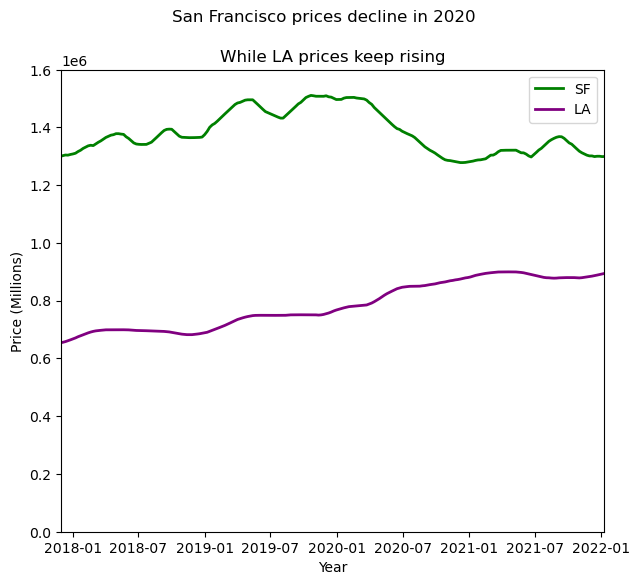

In [20]:
fig, ax = plt.subplots(figsize = (7, 6))

# ax.plot(ca_housing_markets)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['San Francisco'], 
    color = "green",
    linewidth = 2)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['Los Angeles'],
    color = "purple",
    linewidth = 2)

fig.suptitle("San Francisco prices decline in 2020")
ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")

ax.legend(["SF", "LA"], bbox_to_anchor = (1,1))

ax.set_xlim(17500, 19000)
ax.set_ylim(0, 1600000)

# Custom X Ticks

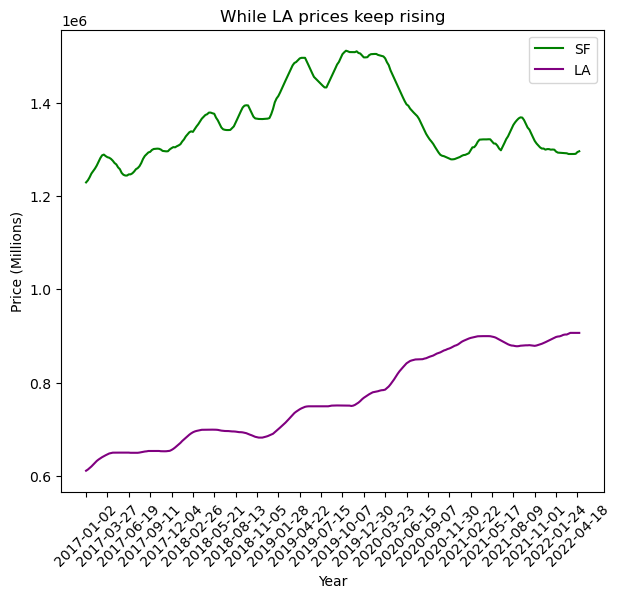

In [22]:
fig, ax = plt.subplots(figsize = (7, 6))

# ax.plot(ca_housing_markets)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['San Francisco'], 
    color = "green")
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['Los Angeles'],
    color = "purple")

ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")

ax.legend(["SF", "LA"])

ax.set_xticks(ca_housing_markets.index[::12]);
plt.xticks(rotation = 45);

# Adding Verticle lines

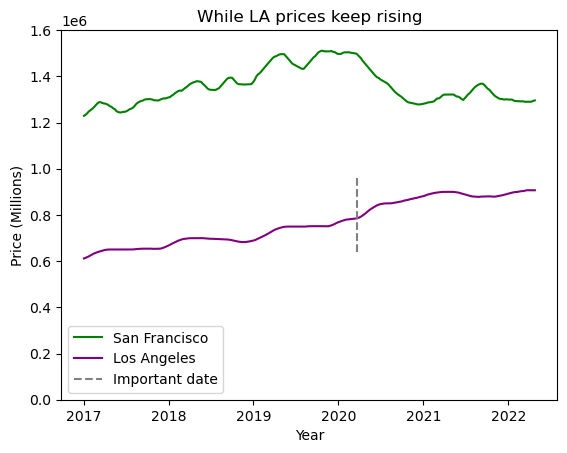

In [23]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['San Francisco'], 
    color = "green", 
    label="San Francisco")
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['Los Angeles'],
    color = "purple", 
    label = "Los Angeles")

ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.set_ylim(0, 1600000)


ax.axvline(18341,ymin = .4, ymax = .6, color = "grey", ls="--", label="Important date");

ax.legend()

In [24]:
import datetime
min(ca_housing_markets.index) - datetime.datetime(1970,1,1)

Timedelta('17168 days 00:00:00')

# Adding text

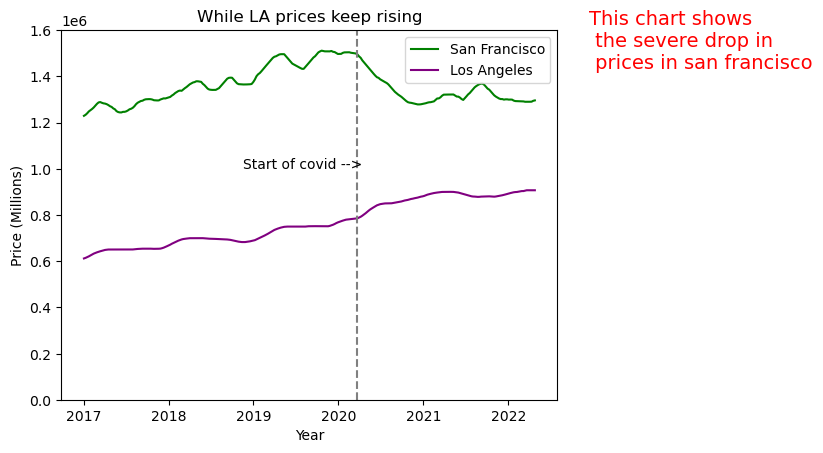

In [25]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['San Francisco'], 
    color = "green", 
    label="San Francisco")
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['Los Angeles'],
    color = "purple", 
    label = "Los Angeles")

ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.set_ylim(0, 1600000)
ax.axvline(18341, color = "grey", ls="--");


ax.text(17850, 1000000, "Start of covid -->")
fig.text(.95, .8, "This chart shows \n the severe drop in \n prices in san francisco", fontsize = 14, color = "red")

ax.legend()

# Text Annotations

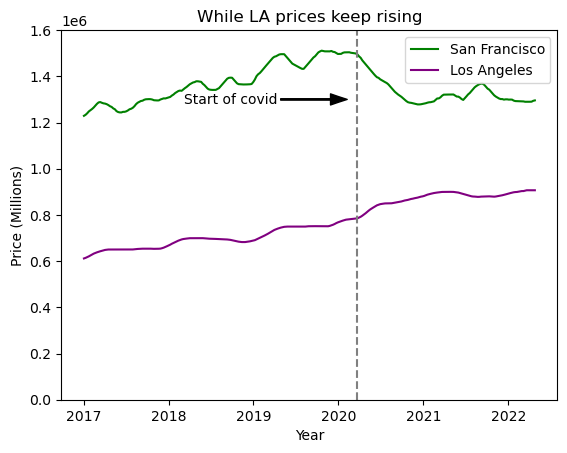

In [33]:
fig, ax = plt.subplots()

# ax.plot(ca_housing_markets)
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['San Francisco'], 
    color = "green", 
    label="San Francisco")
ax.plot(
    ca_housing_markets.index, 
    ca_housing_markets['Los Angeles'],
    color = "purple", 
    label = "Los Angeles")

ax.set_title("While LA prices keep rising")
ax.set_xlabel("Year")
ax.set_ylabel("Price (Millions)")
ax.set_ylim(0, 1600000)
ax.axvline(18341, color = "grey", ls="--");

ax.annotate("Start of covid",
           xy=(18300, 1300000),
           xytext=(17600, 1300000),
           arrowprops=dict(facecolor="black",
                          width=1,
                          headwidth=8,
                          connectionstyle = "angle3, angleA=270, angleB=0"),
           verticalalignment="center")

ax.legend()

# Removing borders

Text(18400, 1, '...while prices elswhere \n in california keep rising')

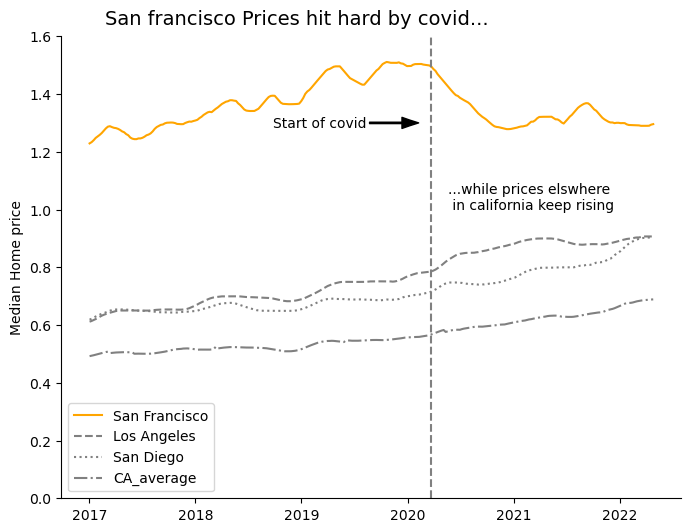

In [75]:
colors = ["orange", "grey", "grey", "grey"]
ls = ["-", "--", ":", "-."]

fig, ax = plt.subplots(figsize=(8,6))

for i, columns in enumerate(ca_housing_markets.columns):
    ax.plot(ca_housing_markets[columns]/1000000,
           color = colors[i],
           ls = ls[i])

ax.set_ylabel("Median Home price")
ax.set_ylim(0, 1.6)
ax.axvline(18341, color = "grey", ls="--");

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
 
ax.legend(ca_housing_markets.columns, loc="lower left")

ax.annotate("Start of covid", 
            xy=(18300, 1.3), 
            xytext=(17800, 1.3),
            arrowprops=dict(facecolor = "black", 
                            width = 1, 
                            headwidth= 8,
                           connectionstyle = 'angle3, angleA=270, angleB = 0'), 
            verticalalignment = 'center')

fig.text(.18, .9, "San francisco Prices hit hard by covid...", fontsize = 14)
ax.text(18400, 1, "...while prices elswhere \n in california keep rising")